<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 8 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (продолжение)
<h3> Plan </h3>


* **SVM: **
 - learning algorithm (повторение)
 - Kernel Trick
 - MultiClasss SVM
 
* **SVM: example of realization **
  - simple SVM
  - true SVM
 
* ** Use cases **
 - Budget optimization
 - Intelligent email sending
 - Man-hours forecasting

In [30]:
import os
import numpy as np
import seaborn as sns
import cPickle as pickle

from matplotlib.colors import ListedColormap
from matplotlib.pyplot import plot, contourf, clabel, contour
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG
from scipy import optimize

-------
<h1 align="center">SVM</h1> 

** Вопросы **
* Основная идея SVM?
* Что такое 
    - разделяющая гиперплоскость
    - опорный вектор
    - Margin?
* Как обучается SVM?

In [40]:
Image(url="http://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png", width=500, height=500)

## $$ L_i = \sum_{j, j \neq y_i} max(0, w_j^tx - w_{y_i}^tx + 1)$$

### Quadratic Programming (QP) Problem:

## $$ b = w_0 $$

## $$ \min_{i = 1, \ldots, l} y_i (<w, x_i> - w_0)  = 1 $$

Linear Separability

## \begin{cases}
    <w, w> \to \min\limits_{w} \\
    y_i (<w, x_i> - w_0) \geq 1, i = 1, \ldots, l
\end{cases}

Linear Inseparability

## \begin{cases}
    \frac{1}{2} <w, w> + C \sum\limits_{i=1}^{l} \xi_i \to \min\limits_{w, \xi} \\
    y_i (<w, x_i> - w_0) \geq 1 - \xi_i, i = 1, \ldots, l \\
    \xi_i \geq 0, i = 1, \ldots, l
\end{cases}

## Linear Model Equivalence
$$ Q(w, w_0) = \sum\limits_{i=1}^{l} (1 - M_i(w, w_0))_{+} + \frac{1}{2C} \|w\|^2 \to \min\limits_{w, w_0} $$

### Dual Form

Before:
## \begin{cases}
    \sum f(x_i) \to \min\limits_{x} \\
    h(x_i) \geq 0, i = 1, \ldots, n
\end{cases}

After:
## \begin{cases}
    \sum f(x_i) - \lambda_i h(x_i) \to \min\limits_{x} \max\limits_{\lambda} \\
    h(x_i) \geq 0, i = 1, \ldots, n \\
    \lambda_i \geq 0, i = 1, \ldots, n \\
    \lambda_i = 0 \ or \  h(x_i) = 0 \ (\sum \lambda_i h(x_i) = 0)
\end{cases}

Calculate derivatives over x and see corollary.


## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j <x_i, x_j> \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### Decision Rule

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i <x_i, x> - w_0 \right) $$
## $$ w_0 = med \{ <w, x_i> - y_i \ |\  \lambda_i > 0 \} $$


--------
## Non-Linear SVM (Kernel Trick)
** Вопросы **
 - Что такое ядро?
 - Примеры ядер?
 - Как строить ядра?
 - Применение ядер для классификации нелинейных выборок

Kernel fuction 
## $$ K : X \times X \to R $$ 
if $ K(x, x') = <\phi(x), \phi(x')> $, where $ \phi : X \to H $ and H is space with inner product

In [17]:
Image(url="http://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png", width=800, height=800)

** Kernel trick **
## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j \color{red}{K(x_i, x_j)} \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i \color{red}{K(x_i, x)} - w_0 \right) $$
## $$ w_0 = med \{ \color{red}{K(w, x_i)}<w, x_i> - y_i \ |\  \lambda_i > 0 \} $$

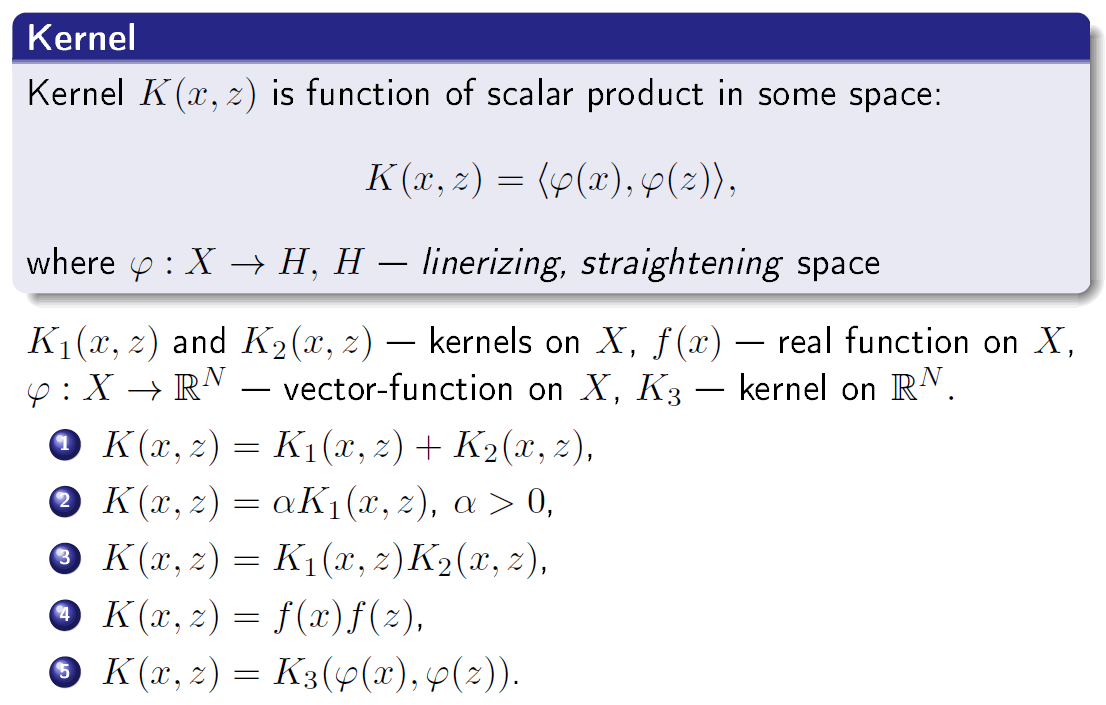

In [14]:
# Kernel and Building kernels
Image('pic/Kernel.png', width=500, height=500)

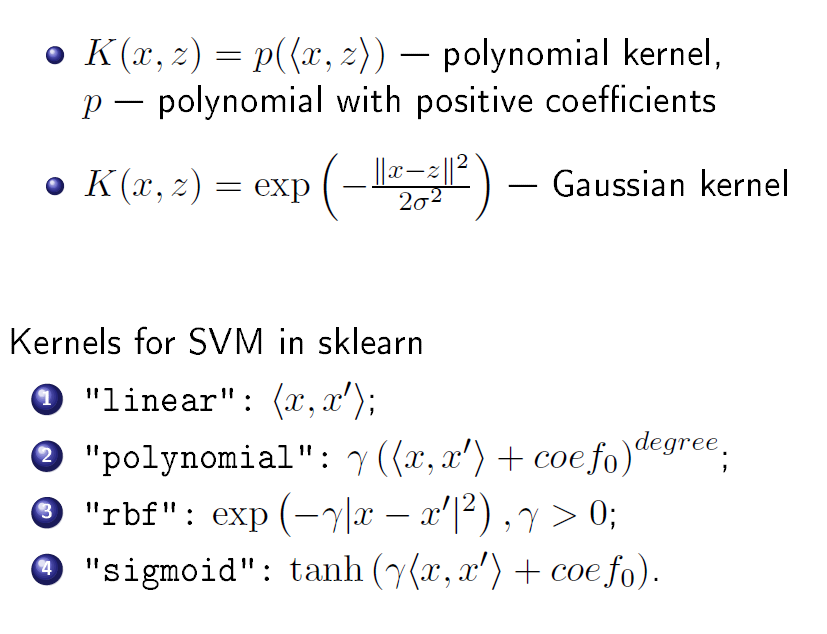

In [13]:
# Example of Kernels
Image('pic/KernelExample.png', width=500, height=500)

** Какое ядро приведёт к линеаризации следующего датасета? **

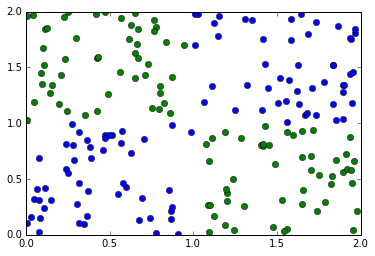

In [44]:
x = np.vstack((np.random.uniform(size=100).reshape((50,2)), np.random.uniform(size=100).reshape((50,2)) + 1)) 
plot(x[:,0], x[:,1], 'bo')
y1 = np.random.uniform(size=100).reshape((50,2))
y2 = np.random.uniform(size=100).reshape((50,2))
y1[:,0] += 1
y2[:,1] += 1
plot(y2[:,0], y2[:,1], 'go')
plot(y1[:,0], y1[:,1], 'go')

** Какое ядро приведёт к линеаризации следующего датасета? **

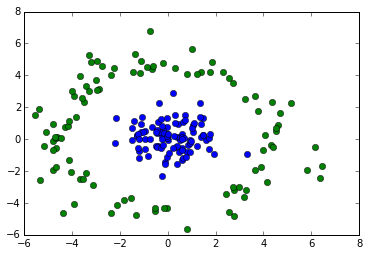

In [45]:
x = np.random.randn(100, 2)
r = np.abs(np.random.randn(100)) + 4
fi = np.random.uniform(0.0, 2 * np.pi, size = 100)
y = np.vstack((r * np.cos(fi), r * np.sin(fi))).T
plot(x[:,0], x[:,1], 'bo')
plot(y[:,0], y[:,1], 'go')

### Example of RBF kernel
<a href='http://cs.stanford.edu/people/karpathy/svmjs/demo/'>Demo SVM</a>

------
## Multiclass SVM
## $$ Y = \{1,..., K\}$$

** Вопросы **
* Как построить SVM для мультиклассовой задачи классификации?
* Какие недостатки у подходов One-to-One и One-to-All?

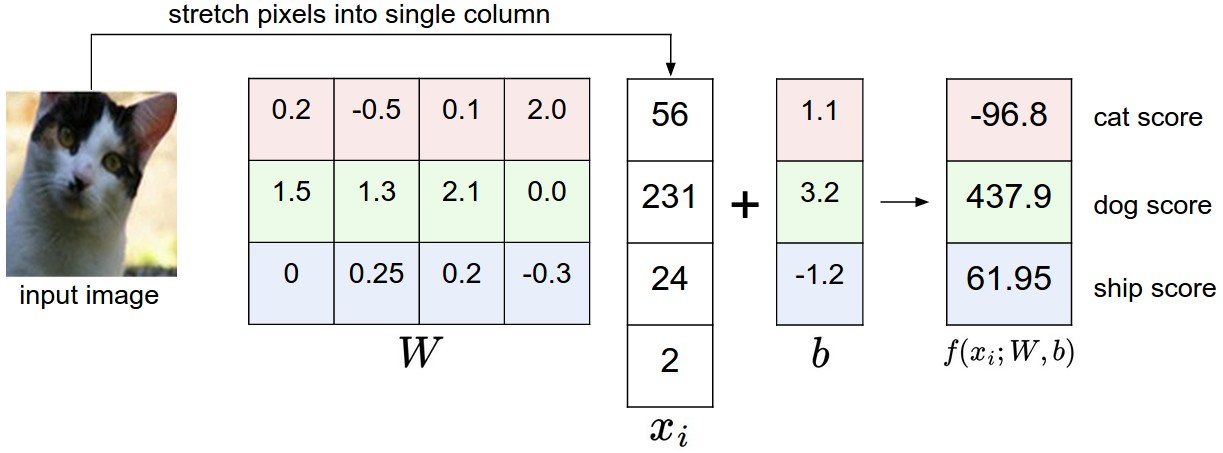

In [22]:
# Решающее правило
display.Image('pic/imagemap.jpg')

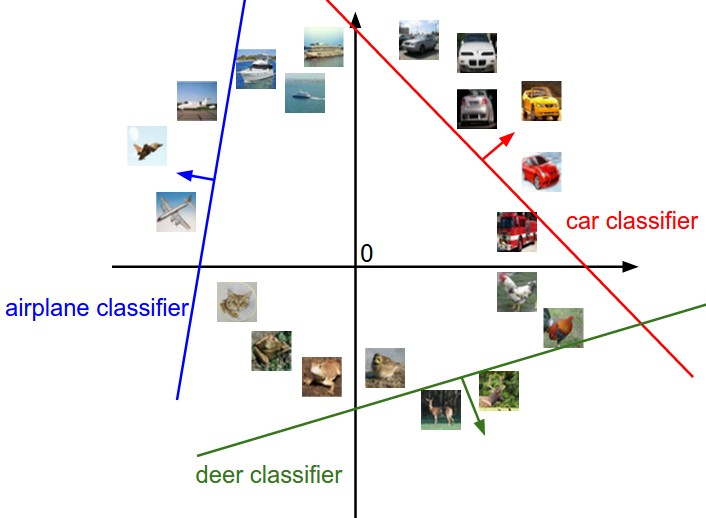

In [23]:
display.Image('pic/pixelspace.jpeg')

<h1 align="center"> SVM Realization </h1>

In [2]:
from collections import Counter
from itertools import product #, izip

from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC

# import time
from cvxopt import matrix, solvers

In [4]:
X, y = datasets.make_classification(n_samples=10000, n_features=20, n_classes=2, n_informative=20, n_redundant=0,
                                    random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print len(X), len(y)
print len(X_train)

10000 10000
8000


In [5]:
Y_train.shape

(8000L,)

## Explore SVM

### QP-solver (cvxopt)

* [Библиотека CVXOPT](http://cvxopt.org/)
* [Документация библиотеки](http://cvxopt.org/documentation/index.html)
* [Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

In [7]:
def smo_svm(X, Y, C = 1.0, kernl = lambda a, b : np.dot(a.T, b), max_passes = 100, tol = 1e-12):
    
    lambd = np.zeros(len(X))
    b = 0.0
    
    passes = 0
    iters = 0
    while passes < max_passes:
        
        if iters > 10000:
            print "10000 iters!!!"
            break
            
        num_changed_lambds = 0
        
#         for objects in Learning Sample
        for i in xrange(len(X) - 1):

            Ei = svm_func(X[i,:], X, Y, lambd, b) - Y[i]
            
            if Y[i] * Ei < -tol and lambd[i] < C or Y[i] * Ei > tol and lambd[i] > 0.0:
                j = np.random.randint(i + 1, len(X))
                
                #print "optimizing %d %d" % (i, j)
                
                Ej = svm_func(X[j,:], X, Y, lambd, b) - Y[j]
                lambd_i_old = lambd[i]
                lambd_j_old = lambd[j]
                if (Y[i] != Y[j]):
                    L = max(0,lambd[j] - lambd[i])
                    H = min(C, C + lambd[j] - lambd[i])
                else:
                    L = max(0,lambd[i] + lambd[j] - C)
                    H = min(C,lambd[i] + lambd[j])
                    
                if (L == H):
                    continue
                    
                nu = 2 * kernl(X[i,:], X[j,:]) - kernl(X[i,:], X[i,:]) - kernl(X[j,:], X[j,:])
                
                if nu >= 0.0:
                    continue
                
                lambd[j] = lambd[j] - (Y[j] * (Ei - Ej)) / (nu)
                
                if lambd[j] > H:
                    lambd[j] = H
                
                if lambd[j] < L:
                    lambd[j] = L
                    
                if abs(lambd[j] - lambd_j_old) < 1e-7:
                    continue
                    
                lambd[i] = lambd[i] + Y[i] * Y[j] * (lambd_j_old - lambd[j])
                
                b1 = b - Ei - Y[i] * (lambd[i] - lambd_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (lambd[j] - lambd_j_old) * kernl(X[i,:], X[j,:])

                b2 = b - Ej - Y[i] * (lambd[i] - lambd_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (lambd[j] - lambd_j_old) * kernl(X[j,:], X[j,:])
                    
                if 0.0 < lambd[i] and lambd[i] < C:
                    b = b1
                elif 0.0 < lambd[j] and lambd[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                    
                num_changed_lambds = num_changed_lambds + 1
            
            iters += 1
            if iters % 10 == 0:
                print "%d iters done" % iters
            if num_changed_lambds == 0:
                passes += 1
            else:
                passes = 0
            

    return lambd, b

In [8]:
def svm_func(x, X, Y, lambd, b, ind = None, kernl = lambda a, b : np.dot(a.T, b)):
    if ind is None:
        ind = range(len(X));
    res = 0.0
    for i in xrange(len(lambd)):
        res += lambd[i] * Y[ind[i]] * kernl(X[ind[i],:], x)
    return res + b

In [9]:
# The real_SVM
def the_svm(X, Y, C = 1.0, kernl = lambda a , b : np.dot(a.T, b)):

    n_samples, n_features = X.shape

    M = np.zeros((n_samples, n_samples))

    for i in xrange(len(X)):
        for j in xrange(len(X)):
            M[i, j] = kernl(X[i,:], X[j,:]) * Y[i] * Y[j]
    
    P = cvxopt.matrix(M)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(Y, (1,n_samples))
    b = cvxopt.matrix(0.0)

    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples) * C
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    lambd = np.ravel(solution['x'])

    sv = lambd > 1e-5
    ind = np.arange(len(lambd))[sv]
    lambd = lambd[sv]
    svec = X[sv]
    svec_y = Y[sv]

    b = 0.0
    for n in range(len(lambd)):
        b += sv_y[n]
        b -= np.sum(lambd * sv_y * K[ind[n],sv])
    b /= len(lambd)
    
    return lambd, b, sv, sv_y, ind

In [12]:
x = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.4]])
y = np.array([1.0, -1.0, 1.0, -1.0])

In [13]:
lambd, b = smo_svm(x, y, C=100.0)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done


(array([ 0.78450718,  1.13179077,  1.21549293,  0.86820923]), 1.0)

[ 0.  0.] 1.0
[ 1.  0.] -1.0
[ 0.  1.] 1.0
[ 1.   1.4] -1.0


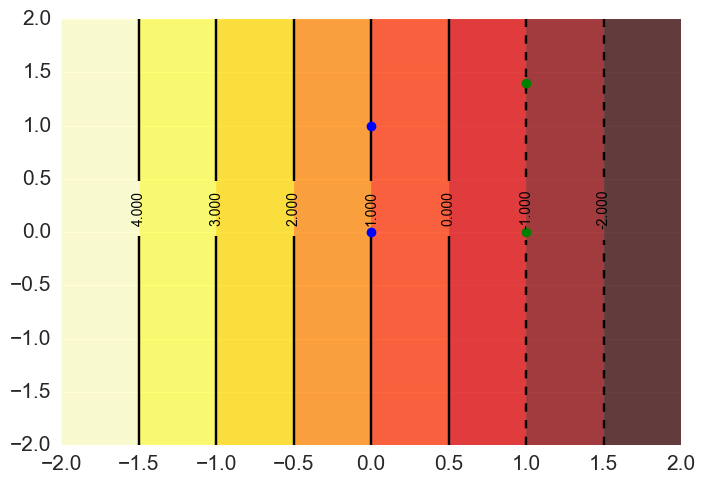

In [33]:
n = 10
xx = np.linspace(-2, 2, n)
yy = np.linspace(-2, 2, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in xrange(len(xx)):
    for j in xrange(len(xx)):
        F[j, i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b)

contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black', linewidth=.5), inline=1, fontsize=10)
for i in xrange(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
        print x[i,:], y[i]
    else:
        plot(x[i, 0], x[i,1], 'go')
        print x[i,:], y[i]

In [35]:
x = np.random.randn(20,2)
x[10:,0] += 3
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [36]:
lambd, b = smo_svm(x, y, C=10.0)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done
140 iters done
150 iters done
160 iters done
170 iters done
180 iters done
190 iters done
200 iters done
210 iters done
220 iters done
230 iters done
240 iters done
250 iters done
260 iters done
270 iters done
280 iters done
290 iters done
300 iters done
310 iters done
320 iters done
330 iters done
340 iters done
350 iters done
360 iters done
370 iters done
380 iters done
390 iters done
400 iters done
410 iters done
420 iters done
430 iters done
440 iters done


(array([  2.72318676e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+01,   2.35934330e+00,
          0.00000000e+00,   4.66742804e+00,  -2.08166817e-17,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   4.15102018e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]), 1.8489745001026188)

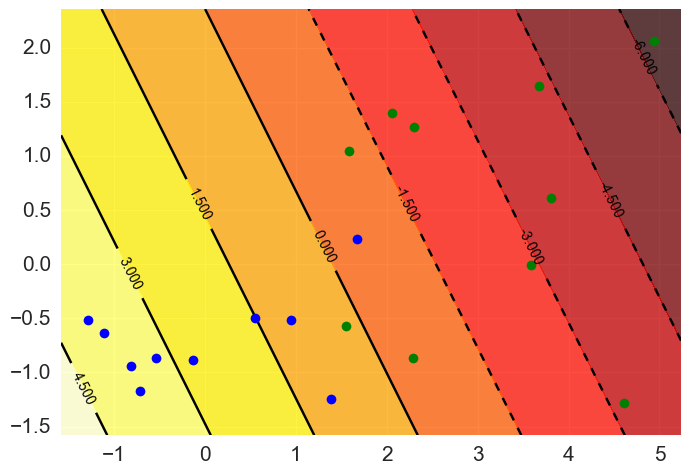

In [37]:
n = 10
xx = np.linspace(np.min(x[:,0])-0.3, np.max(x[:,0]) + 0.3, n)
yy = np.linspace(np.min(x[:,1])-0.3, np.max(x[:,1]) + 0.3, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in xrange(len(xx)):
    for j in xrange(len(xx)):
        F[j,i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b)

contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black', linewidth=.5), inline=1, fontsize=10)
for i in xrange(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
    else:
        plot(x[i, 0], x[i,1], 'go')

In [38]:
x = np.random.randn(20,2)
x[10:,0] += 2
x[10:,:] *= 1
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [39]:
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, gamma=0.1):
    return (np.exp(-gamma*np.dot(x-y, x-y)))

In [40]:
# Learn Kernel SVM
lambd, b = smo_svm(x, y, C=10.0, kernl=polynomial_kernel)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done
140 iters done
150 iters done
160 iters done
170 iters done
180 iters done
190 iters done
200 iters done
210 iters done
220 iters done
230 iters done
240 iters done
250 iters done
260 iters done
270 iters done
280 iters done
290 iters done
300 iters done
310 iters done
320 iters done
330 iters done
340 iters done
350 iters done
360 iters done
370 iters done
380 iters done
390 iters done
400 iters done
410 iters done
420 iters done
430 iters done
440 iters done
450 iters done
460 iters done
470 iters done
480 iters done
490 iters done
500 iters done
510 iters done
520 iters done
530 iters done
540 iters done
550 iters done
560 iters done
570 iters done
580 iters done
590 iters done
600 iters done
610 iters done
620 iters done
630 iters done
640 iters done
650 iters done
660 iters done
670 iters done
680 

(array([  0.        ,   0.        ,   3.74894053,   0.        ,
          0.        ,   0.        ,   0.        ,   0.96366765,
          0.        ,  10.        ,   0.        ,   0.        ,
          0.        ,  10.        ,   0.        ,   0.        ,
          4.71260818,   0.        ,   0.        ,   0.        ]),
 1.0419371103800465)

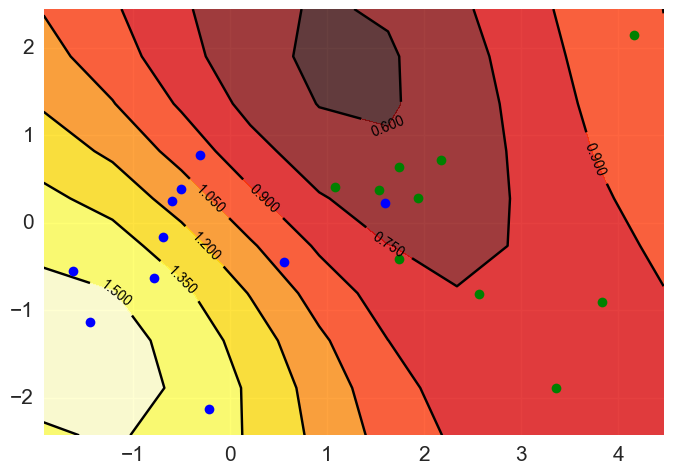

In [41]:
# Draw polynomial Kernel
n = 10
xx = np.linspace(np.min(x[:,0])-0.3, np.max(x[:,0]) + 0.3, n)
yy = np.linspace(np.min(x[:,1])-0.3, np.max(x[:,1]) + 0.3, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in xrange(len(xx)):
    for j in xrange(len(xx)):
        F[j,i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b, kernl=gaussian_kernel)

contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black', linewidth=.5), inline=1, fontsize=10)
for i in xrange(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
        #print x[i,:], y[i]
    else:
        plot(x[i, 0], x[i,1], 'go')
        #print x[i,:], y[i]

<h1 align="center"> Use cases </h1>

## Budget optimization
<a href='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/06-trees_ensembles_2/animated_series.pdf'>See description</a>
## Intelligent email sending
<a href='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/06-trees_ensembles_2/animated_series.pdf'>See description</a>
## Man-hours forecasting

<h1 align="center">Заключение</h1>  

** SVM **
* Достоинства
    - Сильная обощающая способность
    - Выпуклая задача оптимизация (наличие решения)
    - Не нужны все объекты обучающей выборки для обучения
* Недостатки:
    - пока не добрались :)

** HW ** 

** Обратная связь ** 
  * оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a>
  * оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции